# <i> HW2 - Forecasting the Sales of Unleaded Gasoline using Linear Regression</i>
### Beyza Ünsal 2018402036

## 1- Introduction 
In this study, the sales of unleaded gasoline will be forecasted for the four quarters of 2007 using  past data between 2000 and 2006. This file that will be used contains quarterly gasoline and diesel sales (in 1000 m3) of a major distributor between 2000 and 2006, and a number of potential independent variables. These variables are:<br>
* **Unleaded Gasoline Sale (UGS)** in a given quarter <br>
* **RNUV**-> An index indicating the rate of new unleaded gasoline using vehicles being added to the traffic in a quarter<br>
* **Price of Unleaded Gasoline (PU)**-> Average price (adjusted with an index) of a liter of unleaded gasoline in a quarter<br>
* **Price of Diesel Gasoline (PG)** -> Average price (adjusted with an index) of a liter of diesel gasoline in a quarter<br>
* **#Unleaded Gasoline Vehicles (NUGV)** -> Number of unleaded gasoline using vehicles in the traffic<br>
* **# of Diesel Gasoline Vehicles (NDGV)** -> Number of diesel gasoline using vehicles in the traffic (per 1000 people)<br>
* **GNP Agriculture** -> Agriculture component of Gross National Product (adjusted with an index)<br>
* **GNP Commerce** -> Commerce component of Gross National Product (adjusted with an index)<br>
* **GNP Total** -> Grand total for GNP (agriculture, commerce and other components total)<br>
When building linear models, there are some assumptions that need to be checked which are:

* Linearity
* Residuals

  * residuals ~ Normal(0,sigma)<br>
  * residuals are iid<br>
  
These assumptions should be checked when choosing the most suitable model for the UGS estimation. In addition, after selecting the independent variables that best explain UGS among the variables summarized above, adding trend - seasonality - lag components to the model will be considered.
 
  
 

In [1]:
require(GGally)
library(ggplot2)    
library(ggfortify)  
library(forecast)   
library(xts)       
library(ggcorrplot) 
library(openxlsx)                      
library(zoo)
library(dplyr)
library(lubridate)
library(stringr)
library(skimr)
library(data.table)

Loading required package: GGally
Loading required package: ggplot2
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method                 from     
  autoplot.Arima         ggfortify
  autoplot.acf           ggfortify
  autoplot.ar            ggfortify
  autoplot.bats          ggfortify
  autoplot.decomposed.ts ggfortify
  autoplot.ets           ggfortify
  autoplot.forecast      ggfortify
  autoplot.stl           ggfortify
  autoplot.ts            ggfortify
  fitted.ar              ggfortify
  fortify.ts             ggfortify
  residuals.ar           ggfortify
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package

## 2-Preparing data for  analysis


In [2]:
df<-read.csv("IE360_Spring22_HW2_data.csv")


In [3]:
df

Quarter,Unleaded.Gasoline.Sale..UGS.,RNUV,X..LPG.Vehicles..NLPG.,Price.of.Unleaded.Gasoline..PU.,Price.of.Diesel.Gasoline..PG.,X..Unleaded.Gasoline.Vehicles..NUGV.,X..of.Diesel.Gasoline.Vehicles..NDGV.,GNP.Agriculture,GNP.Commerce,GNP.Total
2000_Q1,1 128 971,0.0146,940 000,469.03,355.69,4 647 500,281.9853,1 040 173,3 483 132,18 022 686
2000_Q2,1 199 569,0.0205,941 000,459.42,344.58,4 742 876,284.0813,1 760 460,4 525 451,21 797 130
2000_Q3,1 370 167,0.0207,943 500,439.98,327.21,4 840 931,286.7169,6 974 808,5 915 204,30 050 207
2000_Q4,1 127 548,0.0163,948 000,402.08,300.67,4 919 685,288.3137,3 267 125,4 929 778,24 480 153
2001_Q1,1 033 918,0.0071,950 000,411.58,305.75,4 954 754,287.6237,1 004 528,3 418 387,15 832 648
2001_Q2,1 019 754,0.0051,955 000,520.39,374.78,4 980 204,287.8814,1 449 357,4 359 831,20 296 918
2001_Q3,1 209 916,0.0041,967 500,530.37,398.71,5 000 446,287.5452,5 890 424,5 925 547,28 017 963
2001_Q4,1 002 789,0.0048,990 000,496.35,370.70,5 024 693,286.9786,1 940 854,4 559 190,22 656 812
2002_Q1,893 722,0.0012,1 000 000,479.52,352.72,5 030 810,286.3783,832 953,3 374 849,18 393 446
2002_Q2,1 027 252,0.0032,1 001 000,506.36,373.44,5 046 960,286.0471,1 419 764,4 363 782,20 382 635


In [4]:
col_names=c("Quarter","UGS","RNUV","NLPG","PU","PG","NUGV","NDGV","GNPA","GNPC","GNP")

In [5]:
colnames(df)=col_names

In [6]:
str(df)

'data.frame':	32 obs. of  11 variables:
 $ Quarter: Factor w/ 32 levels "2000_Q1","2000_Q2",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ UGS    : Factor w/ 29 levels ""," 736 580",..: 25 27 29 24 20 18 28 17 11 19 ...
 $ RNUV   : num  0.0146 0.0205 0.0207 0.0163 0.0071 0.0051 0.0041 0.0048 0.0012 0.0032 ...
 $ NLPG   : Factor w/ 32 levels " 940 000"," 941 000",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ PU     : num  469 459 440 402 412 ...
 $ PG     : num  356 345 327 301 306 ...
 $ NUGV   : Factor w/ 32 levels "4 647 500","4 742 876",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ NDGV   : num  282 284 287 288 288 ...
 $ GNPA   : Factor w/ 32 levels " 832 953"," 841 604",..: 6 16 31 24 3 11 25 17 1 9 ...
 $ GNPC   : Factor w/ 32 levels "3 374 849","3 418 387",..: 3 10 23 14 2 6 24 11 1 7 ...
 $ GNP    : Factor w/ 32 levels "15 832 648","18 022 686",..: 2 9 26 15 1 5 21 11 3 6 ...


In [7]:
for (col in colnames(df)[-1]){
    df[,col]=as.character(df[,col])
    df[,col]<-str_replace_all(df[,col], " ", "")
    df[,col]<-as.numeric(df[,col])
}
df$Quarter=as.character(df$Quarter)
df$Quarter<-str_replace_all(df$Quarter, "_", " ")
df$Quarter<-as.Date(as.yearqtr(df$Quarter))

In [8]:
df_tr=df[is.na(df$UGS)==FALSE,]
df_te=df[is.na(df$UGS)==TRUE,]

In [9]:

skim(df_tr)

-- Data Summary ------------------------
                           Values
Name                       df_tr 
Number of rows             28    
Number of columns          11    
_______________________          
Column type frequency:           
  Date                     1     
  numeric                  10    
________________________         
Group variables            None  

-- Variable type: Date ---------------------------------------------------------
# A tibble: 1 x 7
  skim_variable n_missing complete_rate min        max        median    
* <chr>             <int>         <dbl> <date>     <date>     <date>    
1 Quarter               0             1 2000-01-01 2006-10-01 2003-05-16
  n_unique
*    <int>
1       28

-- Variable type: numeric ------------------------------------------------------
# A tibble: 10 x 11
   skim_variable n_missing complete_rate    mean            sd            p0
 * <chr>             <int>         <dbl>   <dbl>         <dbl>         <dbl>
 1 UGS     

In [10]:
str(df_tr)

'data.frame':	28 obs. of  11 variables:
 $ Quarter: Date, format: "2000-01-01" "2000-04-01" ...
 $ UGS    : num  1128971 1199569 1370167 1127548 1033918 ...
 $ RNUV   : num  0.0146 0.0205 0.0207 0.0163 0.0071 0.0051 0.0041 0.0048 0.0012 0.0032 ...
 $ NLPG   : num  940000 941000 943500 948000 950000 ...
 $ PU     : num  469 459 440 402 412 ...
 $ PG     : num  356 345 327 301 306 ...
 $ NUGV   : num  4647500 4742876 4840931 4919685 4954754 ...
 $ NDGV   : num  282 284 287 288 288 ...
 $ GNPA   : num  1040173 1760460 6974808 3267125 1004528 ...
 $ GNPC   : num  3483132 4525451 5915204 4929778 3418387 ...
 $ GNP    : num  18022686 21797130 30050207 24480153 15832648 ...


In [11]:
data_ts <- xts(x = df_tr[,-1], order.by = df_tr$Quarter)
data_ts_te <- xts(x = df_te[,-1], order.by = df_te$Quarter)
glimpse(data_ts)

An 'xts' object on 2000-01-01/2006-10-01 containing:
  Data: num [1:28, 1:10] 1128971 1199569 1370167 1127548 1033918 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:10] "UGS" "RNUV" "NLPG" "PU" ...
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
 NULL


In [12]:
d_table_tr=as.data.table(data_ts)
d_table_te=as.data.table(data_ts_te)

## 3- Plots of UGS time series

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


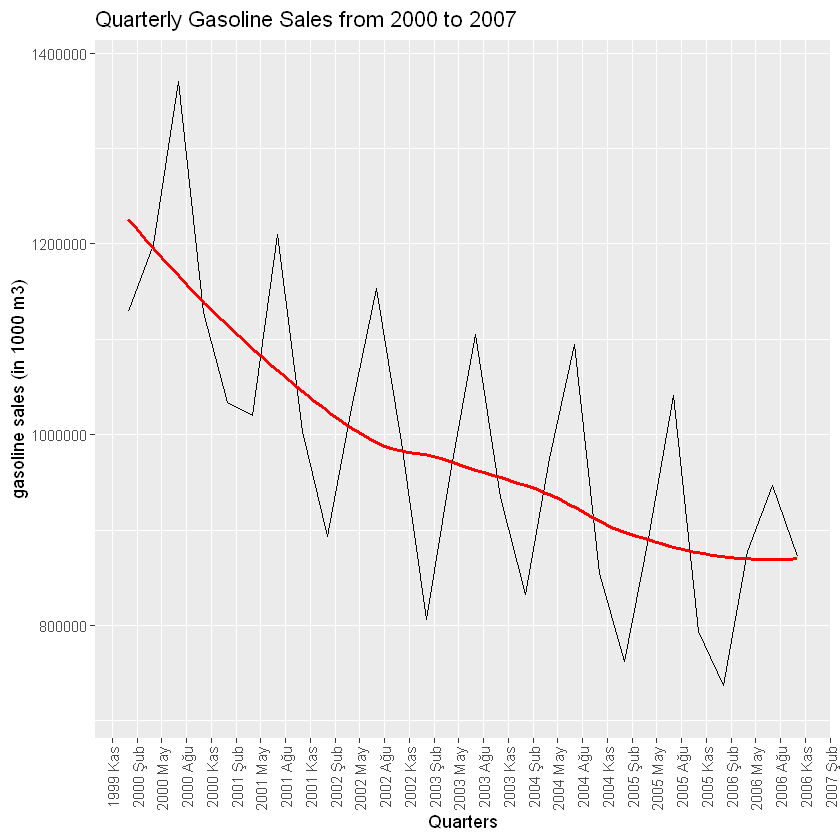

In [13]:
ggplot(df_tr,aes(x=Quarter,y=UGS)) +  geom_line()+
  xlab("Quarters") + ylab("gasoline sales (in 1000 m3)")+ ggtitle("Quarterly Gasoline Sales from 2000 to 2007")+
  scale_x_date(date_breaks = '3 month', date_labels = '%Y %b', date_minor_breaks = '3 month') +
  geom_smooth(color='red',linetype='solid',fill=NA)+theme(axis.text.x=element_text(angle=90,hjust=1, vjust = 0.5))

>Examining the behavior of UGS between 2000 and 2006, it can be seen that pattern that sales shows points to seasonality. While sales rise to the top point of that year in the 3rd quarter of each year, it sees the bottom point in quarter 1 or quarter 4.<br>
Looking at the smoothing curve, there is a general downward trend in sales, which means that the mean value decreases over time.
Therefore, this time series has a non-stationary mean. When looking at the variance, it can be said that this time series  has a stationary variance, since there is no noticeable change in the amplitude of zigzags.

## 4-Autocorrelation functions of the time series UGS & independent variables

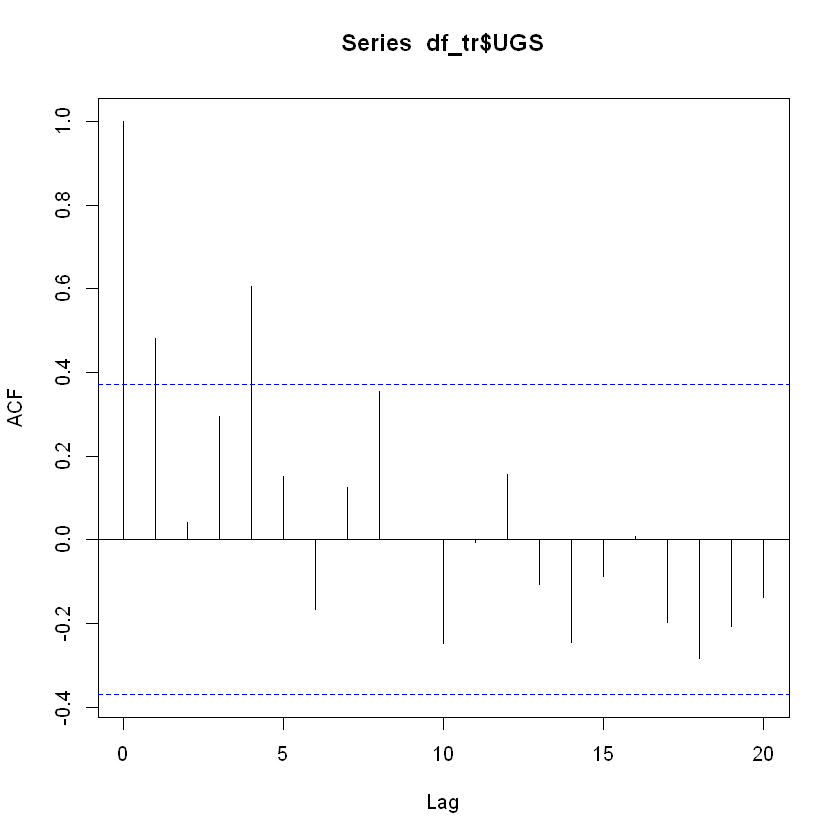

In [14]:
acf(df_tr$UGS, lag.max=20)

>As can be seen from the autocorrelation graph above, in each period containing four lags, the highest autocorrelation value of that period is seen at the end of the period, that is, at the multiples of lag 4 and 4. Also, there is also a high correlation in lag 1. The reason why the highest correlation is seen in lag 4 and the correlation is higher at multiples of 4 compared to other lags can be explained by seasonality. Such that, since the data is quarterly, each quarter shows a trend in itself. Also, because relatively high autocorrelation is observed in lag 1, y_(t-1) can be used to explain y_(t).

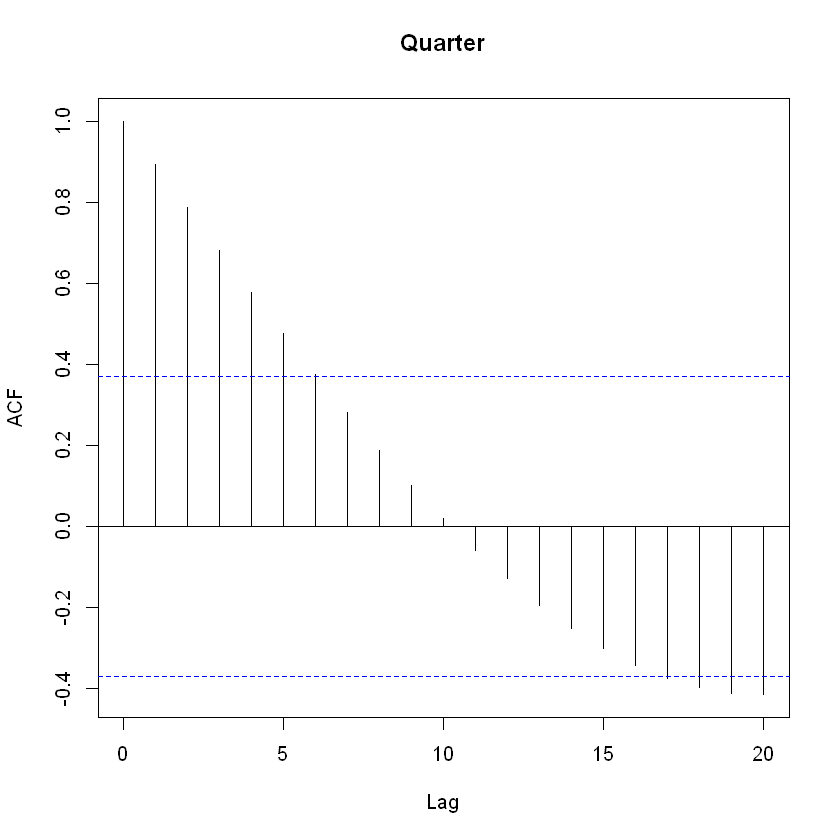

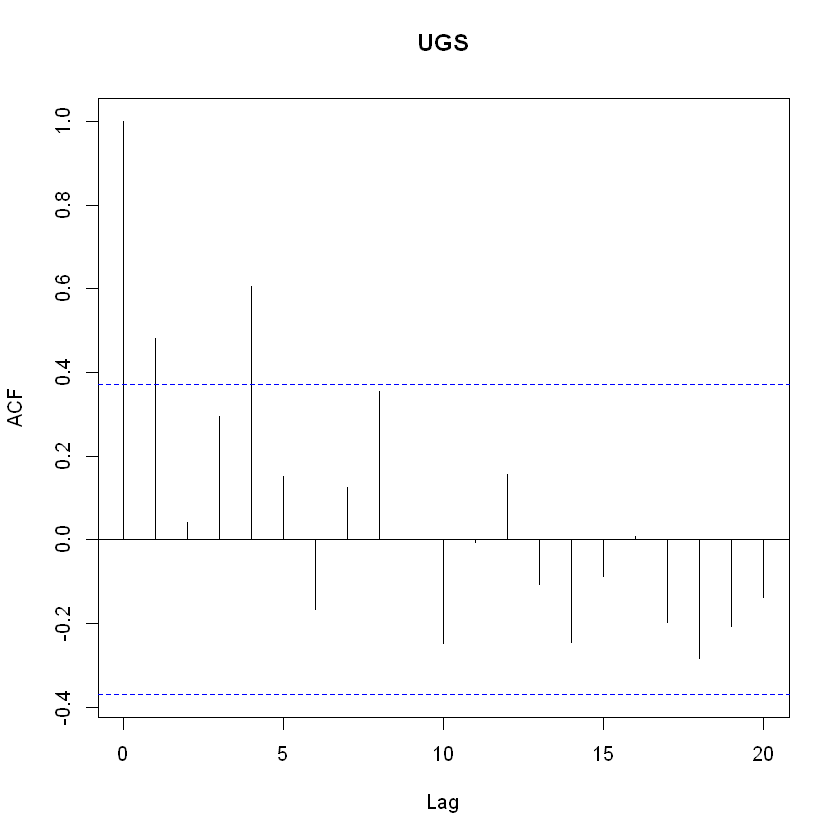

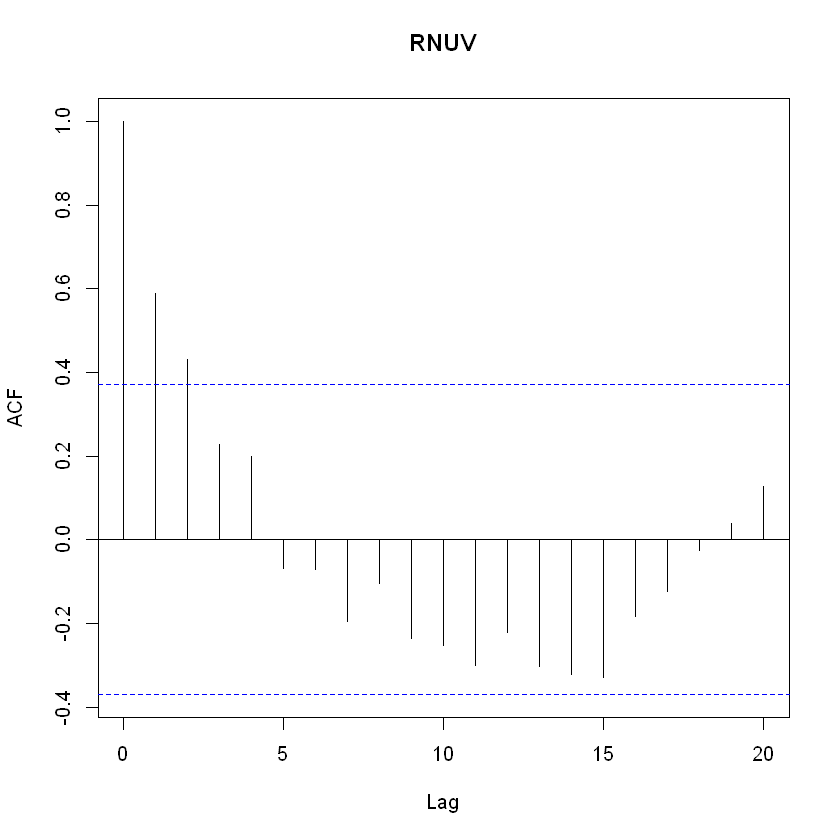

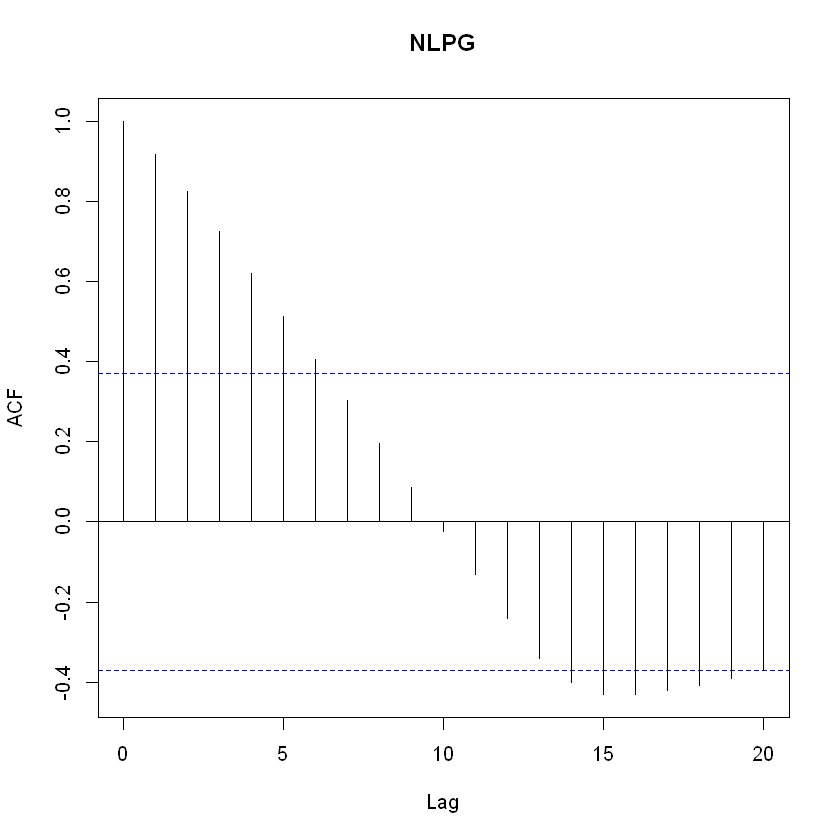

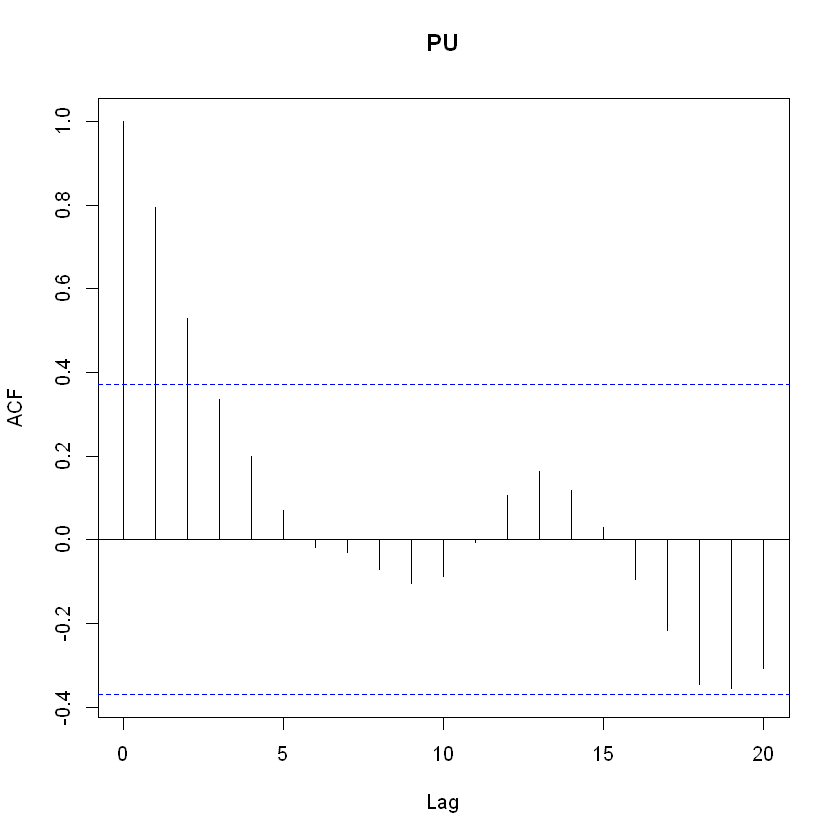

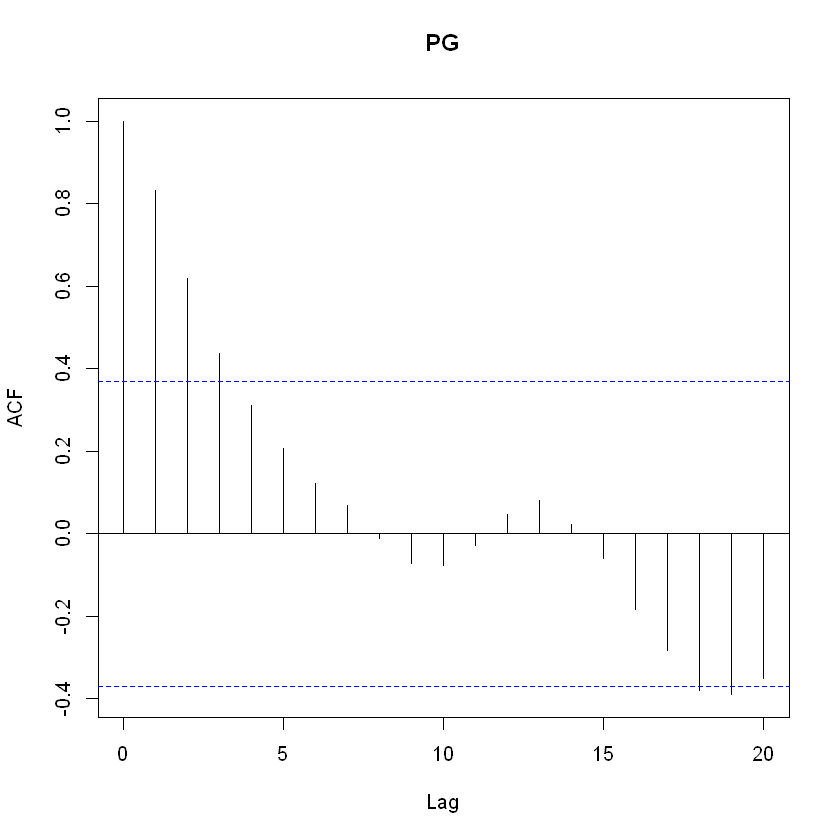

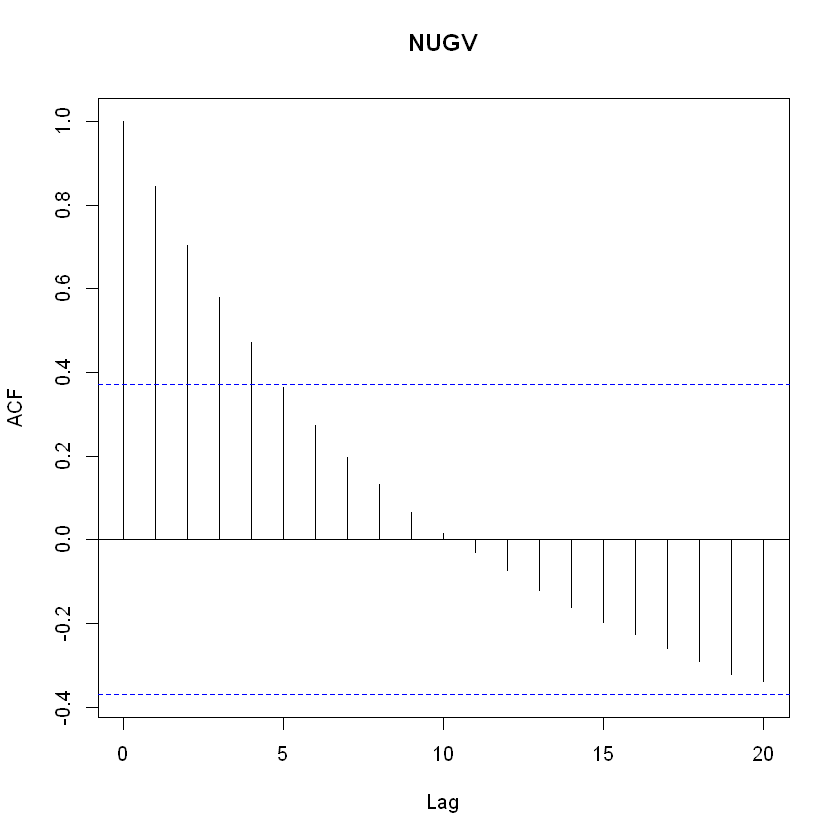

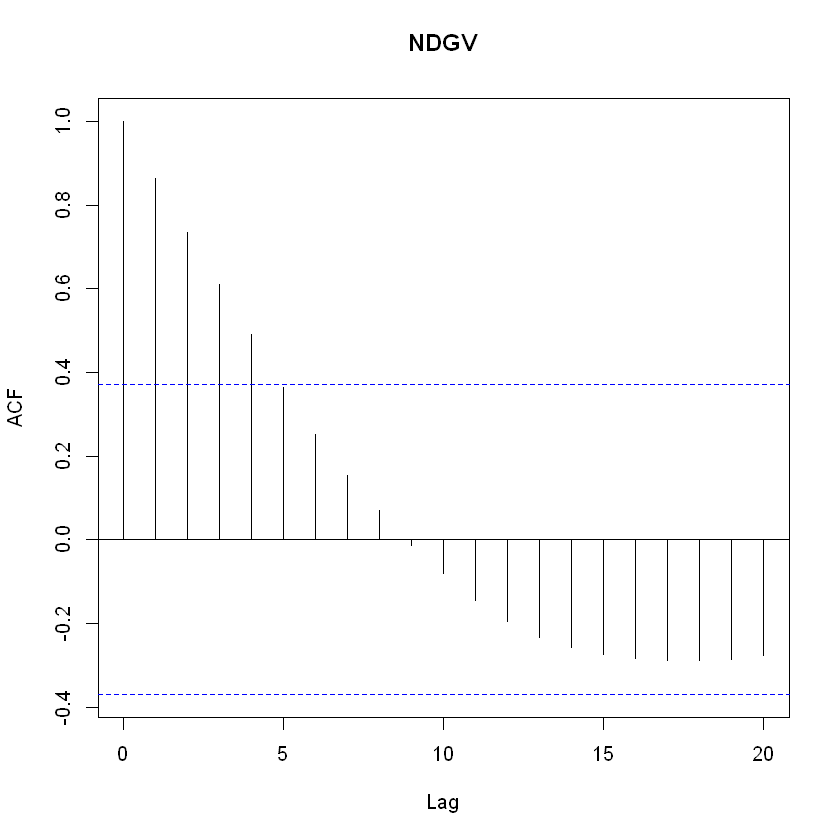

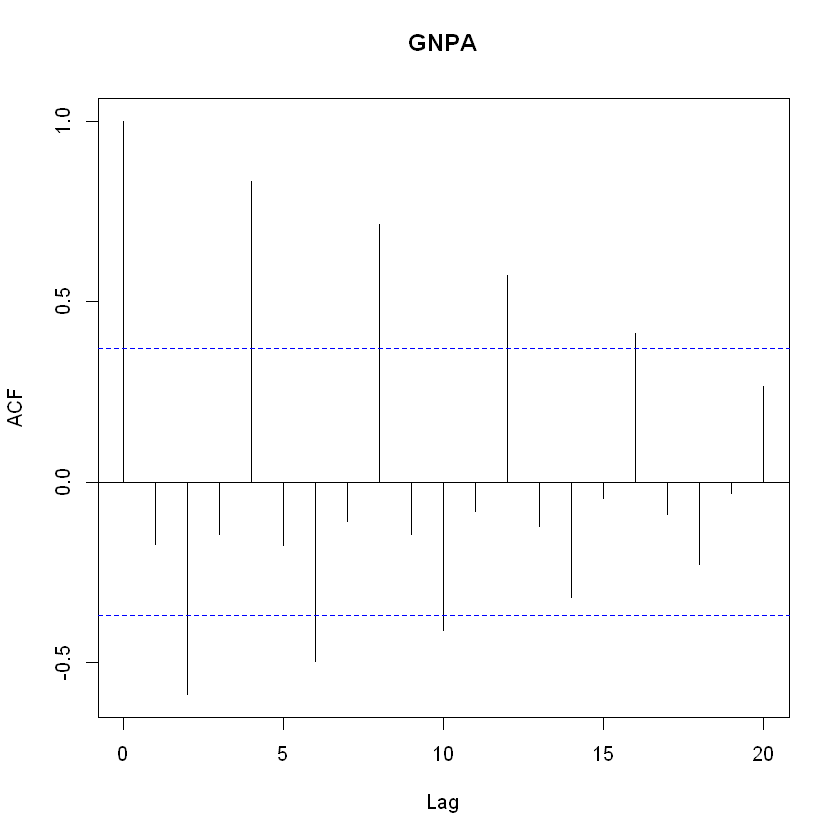

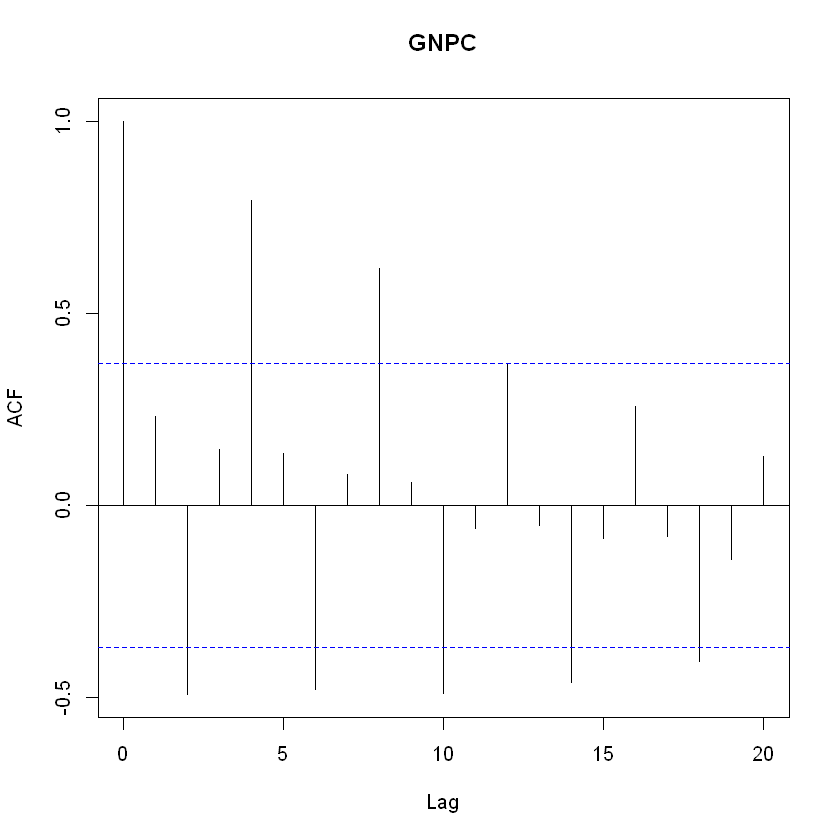

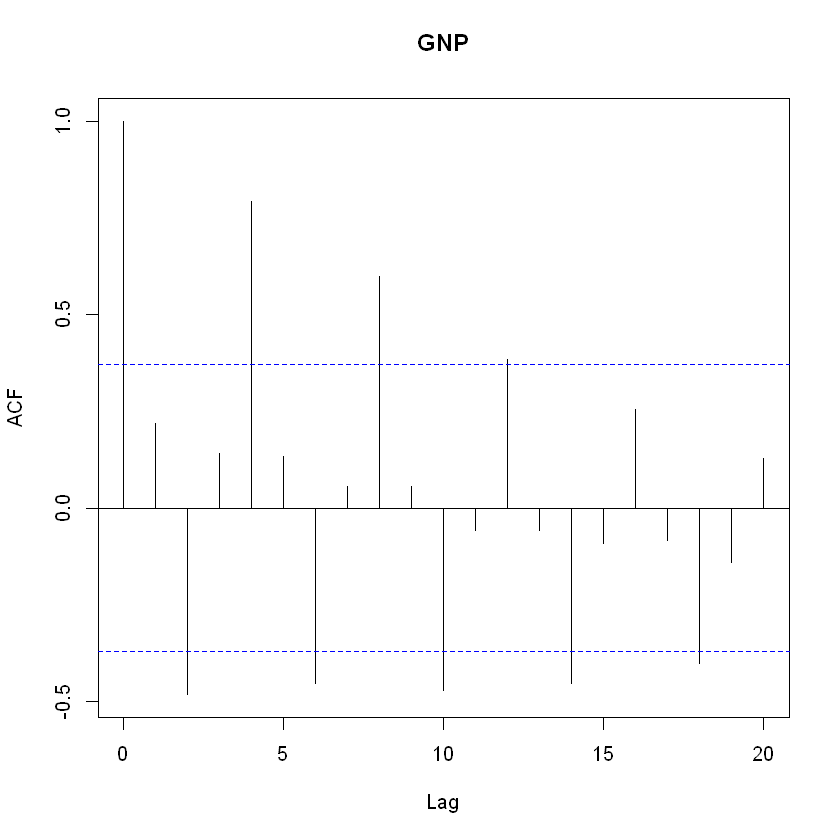

In [15]:
for (i in colnames(df_tr)){
    AutoCorrelation <- acf(df_tr[,i], lag.max=20, plot = FALSE)
plot(AutoCorrelation, main =i )
}
    

> Looking at the autocorrelation functions above, it can be seen that the graphs of PU and PG; NLPG and NDGV; GNPA GNPC and GNP are very similar. This shows that these variables increase and decrease together and exhibit similar behavior. That is, there is likely to be a high correlation between these variables.<br>
Also, if other independent variables other than GNPA, GNPC and GNP are included in the model, the lag 1 values of these variables can be used because the highest autocorrelation values are in lag1. On the other hand, the highest and lowest autocorrelation values for GNPA GNPC and GNP are in lag 2 and lag 4 yehrefore, using these lags can better explain the model if these variables are decided to be included.<br>
In addition, seasonality seems to be effective in the patern of GNPA GNPC and GNP.

## 5-Plots of time series UGS and different independent variables

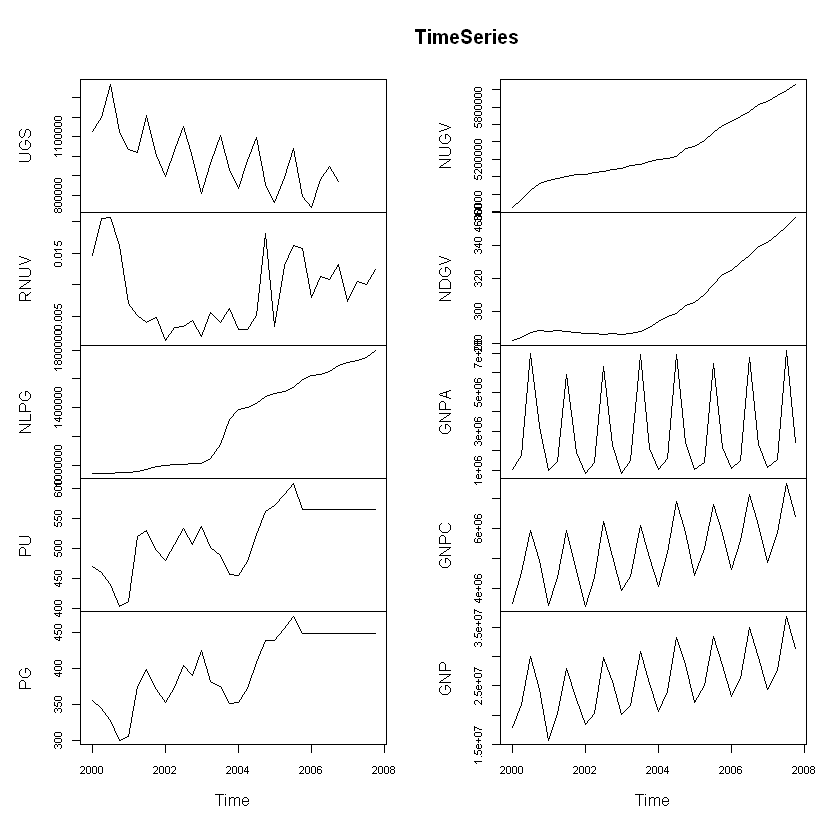

In [16]:
TimeSeries<-ts(df[,-1],frequency=4,start=c(2000,1))
plot(TimeSeries,cex.lab=0.8, cex.axis=0.8, cex.main=1)


> It is mentioned above, the patterns of the variables whose autocorrelation functions are close to each other are quite similar.

## 6-Correlation analysis among different independent variables and UGS

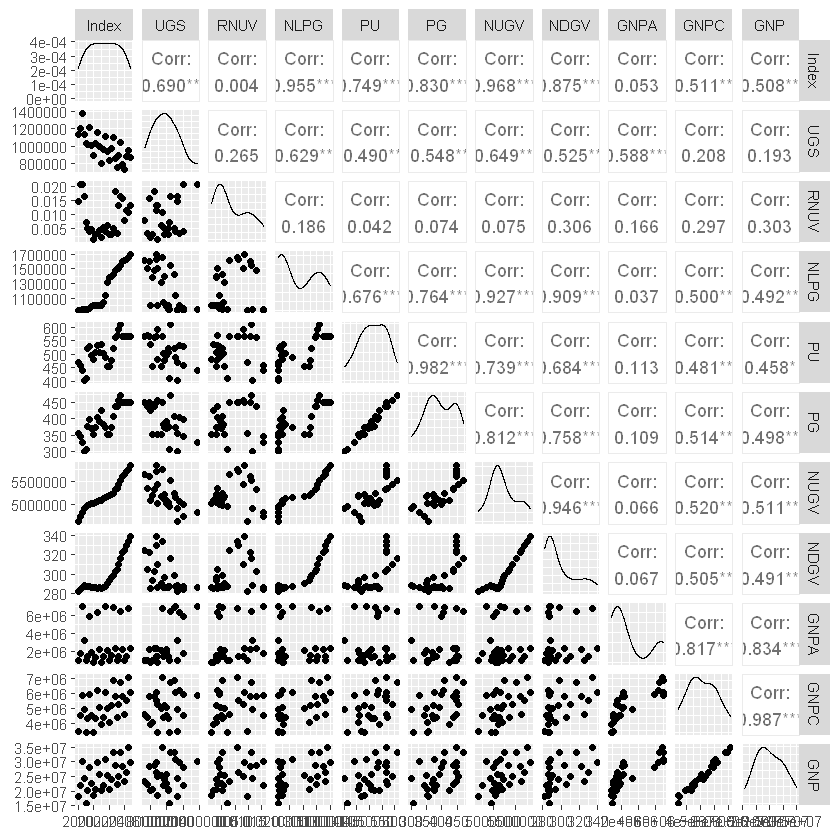

In [17]:
ggpairs(data_ts)

* PU & PG is highly correlated
* GNP & GNPC is highly correlated
* NDGV & NUGV is highly correlated

> Normally, in model, using highly correlated variables as regressor would be problemmatic in terms of the model performance especilly for adjusted R squared. However, since our dataset contains very few observations, it would be more appropriate to add these variables to the model and remove them to adjusted r squared and decide which variables will remain in this way.<br>
In addition, a nonlinear relationship was observed between UGS and NUGV. To explain this, NUGV can be squared and tested in the model.

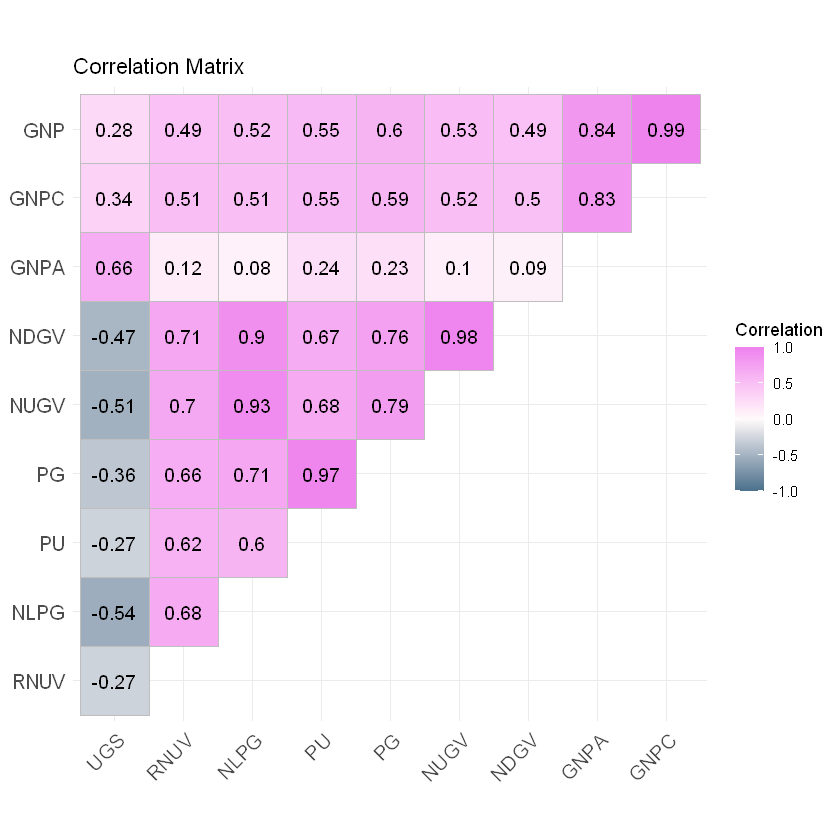

In [18]:
ggcorrplot(corr = cor(d_table_tr[c(-4:-1),c(2:11)]),


           type = "upper", lab = TRUE,
           title = "Correlation Matrix",
           colors = c("skyblue4","snow","violet"),
           legend.title = "Correlation",)

## 7-Models

### 7.1- Models with independent variables only

In [19]:
fit_1<- lm(UGS~.-index,d_table_tr)
summary(fit_1)


Call:
lm(formula = UGS ~ . - index, data = d_table_tr)

Residuals:
   Min     1Q Median     3Q    Max 
-58140 -18111   4792  25903  49756 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.926e+06  3.093e+05   6.227 7.11e-06 ***
RNUV         9.409e+05  2.414e+06   0.390  0.70131    
NLPG        -1.777e-01  8.399e-02  -2.115  0.04862 *  
PU           6.867e+02  1.029e+03   0.667  0.51316    
PG          -1.514e+03  1.336e+03  -1.134  0.27186    
NUGV        -5.296e-01  1.574e-01  -3.366  0.00344 ** 
NDGV         6.483e+03  2.354e+03   2.754  0.01306 *  
GNPA         2.202e-02  1.198e-02   1.838  0.08259 .  
GNPC         1.613e-01  4.840e-02   3.334  0.00369 ** 
GNP         -2.201e-02  1.244e-02  -1.769  0.09379 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 40090 on 18 degrees of freedom
Multiple R-squared:  0.953,	Adjusted R-squared:  0.9295 
F-statistic: 40.58 on 9 and 18 DF,  p-value: 3.879e-10


> It seems that some of the independent variables are insignificant and cause problem. For this reason, by looking at the p values backward selection will be made. 

In [20]:
fit_2<- lm(UGS~.-index-RNUV-PG,d_table_tr)
summary(fit_2)


Call:
lm(formula = UGS ~ . - index - RNUV - PG, data = d_table_tr)

Residuals:
   Min     1Q Median     3Q    Max 
-59046 -19048   2089  25059  53174 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.050e+06  2.883e+05   7.109 6.87e-07 ***
NLPG        -2.052e-01  7.945e-02  -2.582  0.01780 *  
PU          -4.591e+02  2.166e+02  -2.120  0.04673 *  
NUGV        -5.886e-01  9.668e-02  -6.088 5.97e-06 ***
NDGV         7.216e+03  1.427e+03   5.055 6.05e-05 ***
GNPA         2.248e-02  9.962e-03   2.257  0.03537 *  
GNPC         1.734e-01  4.584e-02   3.783  0.00117 ** 
GNP         -2.459e-02  1.051e-02  -2.341  0.02972 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39570 on 20 degrees of freedom
Multiple R-squared:  0.9492,	Adjusted R-squared:  0.9314 
F-statistic: 53.35 on 7 and 20 DF,  p-value: 1.452e-11


> Although the RNUV by definition seems very appropriate to explain the UGS, it greatly reduces the performance of the model. Also, according to the plot, it is seen that there is no linear relationship between UGS and RNUV. Therefore the RNUV was excluded from the model. Later, for the other insignificants PU and PG, both were first removed from the model, but since there was a decrease in performance compared to the previous model, the PU model, which by definition is more related to UGS, was kept in the PU model, while PG was removed from the model.

### 7.2- Model with trend&independent variables

In [21]:
d_table_tr[,trend:=c(1:.N)]

In [22]:
fit_3<- lm(UGS~.-index-RNUV-PG,d_table_tr)
summary(fit_3)


Call:
lm(formula = UGS ~ . - index - RNUV - PG, data = d_table_tr)

Residuals:
   Min     1Q Median     3Q    Max 
-68317 -19332   3311  30234  56395 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.627e+06  7.555e+05   3.477  0.00252 **
NLPG        -3.437e-01  1.855e-01  -1.853  0.07951 . 
PU          -5.552e+02  2.472e+02  -2.246  0.03682 * 
NUGV        -8.107e-01  2.854e-01  -2.841  0.01045 * 
NDGV         9.479e+03  3.089e+03   3.068  0.00633 **
GNPA         2.307e-02  1.007e-02   2.292  0.03352 * 
GNPC         1.823e-01  4.742e-02   3.843  0.00110 **
GNP         -2.675e-02  1.091e-02  -2.453  0.02401 * 
trend        8.946e+03  1.080e+04   0.828  0.41791   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39880 on 19 degrees of freedom
Multiple R-squared:  0.9509,	Adjusted R-squared:  0.9303 
F-statistic: 46.03 on 8 and 19 DF,  p-value: 8.014e-11


> Although it is clearly seen that there is a trend in the plot of the UGS, the trend alone could not explain the UGS because seasonality was not added to the model.

### 7.3- Model with seasonality&independent variables

In [23]:
d_table_tr[,seasonality:=as.factor(quarters(d_table_tr$index))]
fit_4<- lm(UGS~.-index-RNUV-PG-trend,d_table_tr)
summary(fit_4)


Call:
lm(formula = UGS ~ . - index - RNUV - PG - trend, data = d_table_tr)

Residuals:
   Min     1Q Median     3Q    Max 
-63654  -9560    107  16154  44263 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.131e+06  2.388e+05   8.921 8.02e-08 ***
NLPG          -1.233e-01  9.136e-02  -1.350  0.19484    
PU            -7.110e+02  2.487e+02  -2.858  0.01088 *  
NUGV          -6.338e-01  7.847e-02  -8.078 3.20e-07 ***
NDGV           8.293e+03  1.167e+03   7.107 1.76e-06 ***
GNPA          -3.086e-02  3.524e-02  -0.876  0.39350    
GNPC           2.142e-02  5.620e-02   0.381  0.70787    
GNP            3.745e-04  1.158e-02   0.032  0.97457    
seasonalityQ2  1.295e+05  3.938e+04   3.289  0.00433 ** 
seasonalityQ3  4.092e+05  1.615e+05   2.534  0.02140 *  
seasonalityQ4  1.168e+05  5.560e+04   2.101  0.05091 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 30690 on 17 degrees of freedom
Multiple R-square

> Even adding seasonality alone gave a significant increase in adjusted R squared. Also, when seasonality is added, seasonality in GNPA, GNPC and GNP is also explained, so these variabls have become insignificant. Therefore, they will be excluded from the model.

In [24]:
fit_4<- lm(UGS~.-index-RNUV-PG-trend-GNPA-GNPC-GNP,d_table_tr)
summary(fit_4)


Call:
lm(formula = UGS ~ . - index - RNUV - PG - trend - GNPA - GNPC - 
    GNP, data = d_table_tr)

Residuals:
   Min     1Q Median     3Q    Max 
-65123 -11181   2616  16938  48633 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.097e+06  2.147e+05   9.767 4.70e-09 ***
NLPG          -1.047e-01  5.559e-02  -1.884  0.07424 .  
PU            -5.592e+02  1.620e+02  -3.452  0.00252 ** 
NUGV          -6.232e-01  7.165e-02  -8.697 3.13e-08 ***
NDGV           8.095e+03  1.043e+03   7.762 1.85e-07 ***
seasonalityQ2  1.302e+05  1.580e+04   8.241 7.35e-08 ***
seasonalityQ3  2.883e+05  1.603e+04  17.981 8.15e-14 ***
seasonalityQ4  1.043e+05  1.610e+04   6.477 2.58e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 29130 on 20 degrees of freedom
Multiple R-squared:  0.9725,	Adjusted R-squared:  0.9628 
F-statistic: 100.9 on 7 and 20 DF,  p-value: 3.347e-14


### 7.4- Model with trend-seasonality&independent variables

In [25]:
fit_5<- lm(UGS~.-index-RNUV-PG-GNPA-GNPC-GNP,d_table_tr)
summary(fit_5)


Call:
lm(formula = UGS ~ . - index - RNUV - PG - GNPA - GNPC - GNP, 
    data = d_table_tr)

Residuals:
   Min     1Q Median     3Q    Max 
-66755 -12431   2269  17787  45831 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.352e+06  5.728e+05   4.106 0.000602 ***
NLPG          -1.654e-01  1.383e-01  -1.195 0.246604    
PU            -5.937e+02  1.801e+02  -3.296 0.003798 ** 
NUGV          -7.231e-01  2.203e-01  -3.282 0.003917 ** 
NDGV           9.102e+03  2.351e+03   3.872 0.001027 ** 
trend          3.894e+03  8.102e+03   0.481 0.636249    
seasonalityQ2  1.299e+05  1.613e+04   8.058 1.51e-07 ***
seasonalityQ3  2.885e+05  1.636e+04  17.638 3.09e-13 ***
seasonalityQ4  1.060e+05  1.682e+04   6.305 4.73e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 29700 on 19 degrees of freedom
Multiple R-squared:  0.9728,	Adjusted R-squared:  0.9613 
F-statistic:  84.9 on 8 and 19 DF,  p-value: 3.152e-13


>To better explain the model, trend and seasonality are added together. Although the trend variable looks insignificant, it will not be removed from the model because there is an obvious trend in the data.

### 7.5- Model with Y_(t-1) as regressor

In [28]:
d_table_tr[,lag1_UGS:=shift(UGS,type="lag",n=1)]
fit_6<-lm(UGS~+PU+NUGV+NDGV+seasonality+trend+lag1_UGS,d_table_tr)
summary(fit_6)



Call:
lm(formula = UGS ~ +PU + NUGV + NDGV + seasonality + trend + 
    lag1_UGS, data = d_table_tr)

Residuals:
   Min     1Q Median     3Q    Max 
-44528 -10996  -4285  15377  39939 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.796e+06  6.050e+05   4.621 0.000212 ***
PU            -6.308e+02  1.628e+02  -3.876 0.001108 ** 
NUGV          -7.551e-01  2.011e-01  -3.755 0.001450 ** 
NDGV           9.724e+03  2.033e+03   4.782 0.000149 ***
seasonalityQ2  9.041e+04  2.366e+04   3.821 0.001252 ** 
seasonalityQ3  3.099e+05  1.729e+04  17.924 6.33e-13 ***
seasonalityQ4  1.985e+05  4.069e+04   4.878 0.000121 ***
trend         -8.559e+03  3.562e+03  -2.403 0.027253 *  
lag1_UGS      -4.865e-01  1.947e-01  -2.499 0.022362 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 27090 on 18 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9778,	Adjusted R-squared:  0.9679 
F-

> When NLPG was removed from the model, the trend became a significant variable. Also, when the lag 1 value of UGS was used as a regressor, the model is improved. 

### 7.6- Model with Y_(t-4) as regressor

In [29]:
d_table_tr[,lag4:=shift(UGS,type="lag",n=4)]
fit_7<-lm(UGS~+PU+NUGV+NDGV+trend+seasonality+lag4,d_table_tr)
summary(fit_7)


Call:
lm(formula = UGS ~ +PU + NUGV + NDGV + trend + seasonality + 
    lag4, data = d_table_tr)

Residuals:
   Min     1Q Median     3Q    Max 
-57464 -12683   2882  16068  48341 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.799e+06  7.926e+05   2.270 0.038386 *  
PU            -5.201e+02  2.089e+02  -2.490 0.024984 *  
NUGV          -4.625e-01  3.515e-01  -1.316 0.208024    
NDGV           6.422e+03  3.859e+03   1.664 0.116816    
trend         -7.491e+03  6.064e+03  -1.235 0.235712    
seasonalityQ2  1.461e+05  3.265e+04   4.474 0.000446 ***
seasonalityQ3  3.114e+05  6.687e+04   4.657 0.000310 ***
seasonalityQ4  1.143e+05  2.897e+04   3.945 0.001298 ** 
lag4          -8.828e-02  2.263e-01  -0.390 0.701987    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32960 on 15 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.9537,	Adjusted R-squared:  0.9291 
F-sta

### 7.7- Model with Y_(t-1) and Y_(t-4) as regressors

In [31]:
fit_8<-lm(UGS~+PU+NUGV+NDGV+trend+seasonality+lag4+lag1_UGS,d_table_tr)
summary(fit_8)


Call:
lm(formula = UGS ~ +PU + NUGV + NDGV + trend + seasonality + 
    lag4 + lag1_UGS, data = d_table_tr)

Residuals:
   Min     1Q Median     3Q    Max 
-44972 -15352  -4168  15562  40851 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.041e+06  9.061e+05   3.357  0.00470 ** 
PU            -5.819e+02  1.886e+02  -3.086  0.00806 ** 
NUGV          -8.422e-01  3.584e-01  -2.350  0.03396 *  
NDGV           1.093e+04  4.010e+03   2.725  0.01644 *  
trend         -1.063e+04  5.600e+03  -1.898  0.07844 .  
seasonalityQ2  1.089e+05  3.370e+04   3.232  0.00602 ** 
seasonalityQ3  3.489e+05  6.209e+04   5.619 6.33e-05 ***
seasonalityQ4  2.131e+05  5.193e+04   4.104  0.00107 ** 
lag4          -1.523e-01  2.042e-01  -0.746  0.46796    
lag1_UGS      -4.908e-01  2.236e-01  -2.195  0.04553 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 29430 on 14 degrees of freedom
  (4 observations deleted due to missingn

>Although lag4 has a high value in autocorrelation function, lag 4 may not have improved the model because trend and seasonality explain lag 4.

### 7.8- Model with X(t-1) and as regressors

In [33]:
d_table_tr[,lag1_PU:=shift(PU,type="lag",n=1)]
d_table_tr[,lag1_NUGV:=shift(NUGV,type="lag",n=1)]
d_table_tr[,lag1_NDGV:=shift(NDGV,type="lag",n=1)]
d_table_tr[,lag1_RNUV:=shift(RNUV,type="lag",n=1)]
fit_9<-lm(UGS~+PU+NUGV+NDGV+trend+seasonality+lag1_NUGV+lag1_UGS,d_table_tr)
summary(fit_9)


Call:
lm(formula = UGS ~ +PU + NUGV + NDGV + trend + seasonality + 
    lag1_NUGV + lag1_UGS, data = d_table_tr)

Residuals:
   Min     1Q Median     3Q    Max 
-43780 -12354  -4238  12964  42631 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.737e+06  6.202e+05   4.413 0.000380 ***
PU            -6.559e+02  1.692e+02  -3.876 0.001214 ** 
NUGV          -4.411e-01  5.019e-01  -0.879 0.391689    
NDGV           8.660e+03  2.584e+03   3.352 0.003783 ** 
trend         -9.774e+03  4.028e+03  -2.427 0.026643 *  
seasonalityQ2  8.527e+04  2.517e+04   3.388 0.003496 ** 
seasonalityQ3  3.071e+05  1.803e+04  17.031 4.06e-12 ***
seasonalityQ4  1.955e+05  4.152e+04   4.708 0.000203 ***
lag1_NUGV     -2.321e-01  3.390e-01  -0.685 0.502781    
lag1_UGS      -5.131e-01  2.014e-01  -2.548 0.020813 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 27500 on 17 degrees of freedom
  (1 observation deleted due to miss

>By looking at the autocorrelation function of the variables mentioned above, their lag 1 were taken. When these variables were added to the model one by one and adjusted R squared and residual standard error were evaluated, it was found that NUGV was the most effective. Therefore, the model that includes only NUGV's lag 1 is illustrated above.

### 7.9- Model with NUGV^2

In [35]:
d_table_tr[,NUGV_sq:=(d_table_tr$NUGV)^2]
fit_10<-lm(UGS~+PU+NUGV+NDGV+seasonality+trend+NUGV_sq+lag1_UGS, d_table_tr)
summary(fit_10)


Call:
lm(formula = UGS ~ +PU + NUGV + NDGV + seasonality + trend + 
    NUGV_sq + lag1_UGS, data = d_table_tr)

Residuals:
   Min     1Q Median     3Q    Max 
-46385 -13951  -3359  15889  38428 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.235e+06  4.222e+06   1.003 0.329915    
PU            -6.152e+02  1.729e+02  -3.558 0.002421 ** 
NUGV          -1.260e+00  1.480e+00  -0.852 0.406264    
NDGV           9.158e+03  2.654e+03   3.451 0.003050 ** 
seasonalityQ2  9.012e+04  2.428e+04   3.712 0.001731 ** 
seasonalityQ3  3.087e+05  1.805e+04  17.102  3.8e-12 ***
seasonalityQ4  1.963e+05  4.220e+04   4.651 0.000229 ***
trend         -7.862e+03  4.174e+03  -1.884 0.076851 .  
NUGV_sq        4.899e-08  1.422e-07   0.345 0.734586    
lag1_UGS      -4.772e-01  2.015e-01  -2.369 0.029963 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 27780 on 17 degrees of freedom
  (1 observation deleted due to missin

> Although a pattern similar to x^2 emerged between NUGV and UGS in pair plots, NUGV^2 did not contribute much to the model.

## 8- Evaluations of the models in terms of RMSE and MAE metrics with LOOCV

> Models with the best adjusted R squared were compared in terms of training error using cross validation to give intuition about which model to choose.Since the number of the observations was small, LOOCV was used.

In [36]:
library(caret)
ctrl <- trainControl(method = "LOOCV")
fit_4_loocv <- train(UGS~+NUGV+PU+NLPG+NDGV+seasonality , data =d_table_tr[-1,c(1:13)] , method = "lm", trControl = ctrl)
fit_4_loocv

Loading required package: lattice


Linear Regression 

27 samples
 5 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 26, 26, 26, 26, 26, 26, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  36673.33  0.9396603  27711.13

Tuning parameter 'intercept' was held constant at a value of TRUE

In [37]:
fit_5_loocv <- train(UGS~+NUGV+PU+NLPG+NDGV+seasonality+trend, data =d_table_tr[-1,c(1:13)] , method = "lm", trControl = ctrl)
fit_5_loocv

Linear Regression 

27 samples
 6 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 26, 26, 26, 26, 26, 26, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  39326.42  0.9312852  30393.36

Tuning parameter 'intercept' was held constant at a value of TRUE

In [38]:
fit_6_loocv <- train(UGS~+PU+NUGV+NDGV+trend+seasonality+lag1_UGS, data =d_table_tr[-1,-15] , method = "lm", trControl = ctrl)
fit_6_loocv

Linear Regression 

27 samples
 6 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 26, 26, 26, 26, 26, 26, ... 
Resampling results:

  RMSE   Rsquared  MAE     
  34248  0.947979  28047.85

Tuning parameter 'intercept' was held constant at a value of TRUE

In [39]:
fit_9_loocv <- train(UGS~+PU+NUGV+NDGV+trend+seasonality+lag1_NUGV+lag1_UGS, data =d_table_tr[-1,-15] , method = "lm", trControl = ctrl)
fit_9_loocv

Linear Regression 

27 samples
 7 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 26, 26, 26, 26, 26, 26, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  35044.38  0.9454717  29288.51

Tuning parameter 'intercept' was held constant at a value of TRUE

In [40]:
fit_10_loocv <- train(UGS~+PU+NUGV+NDGV+seasonality+trend+NUGV_sq+lag1_UGS, data =d_table_tr[-1,] , method = "lm", trControl = ctrl)
fit_10_loocv

Linear Regression 

27 samples
 7 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 26, 26, 26, 26, 26, 26, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  39772.62  0.9336665  31524.32

Tuning parameter 'intercept' was held constant at a value of TRUE

Warning message:
"Removed 1 row(s) containing missing values (geom_path)."Warning message:
"Removed 1 row(s) containing missing values (geom_path)."

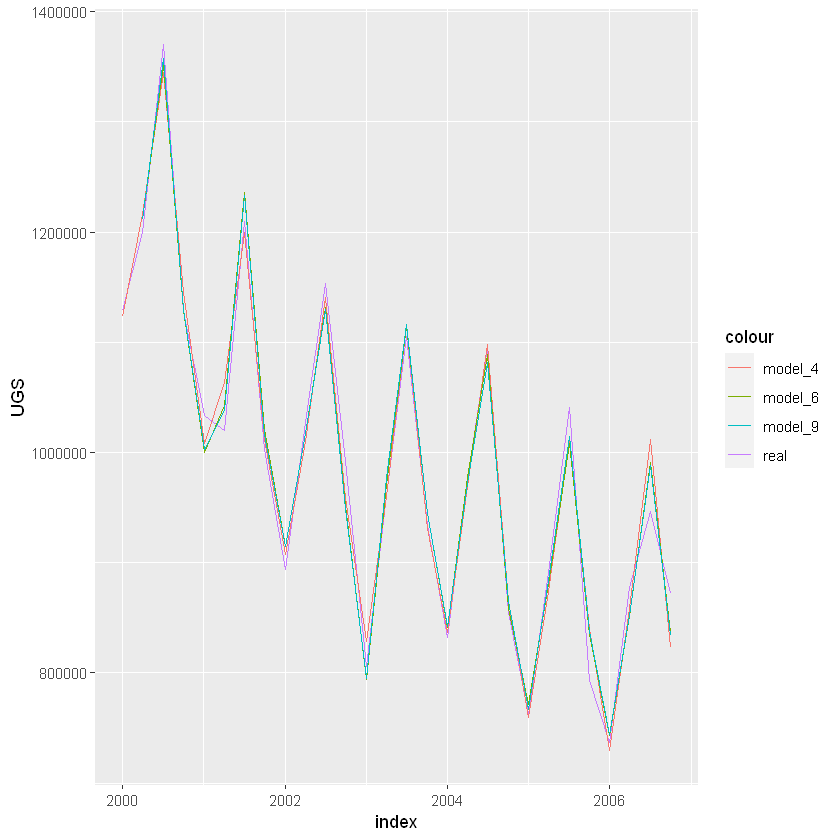

In [62]:
ggplot(d_table_tr ,aes(x=index)) +
        geom_line(aes(y=UGS,color='real')) + 
        geom_line(aes(y=predict(fit_4,d_table_tr),color='model_4')) + 
        geom_line(aes(y=predict(fit_6,d_table_tr),color='model_6')) +
        geom_line(aes(y=predict(fit_9,d_table_tr),color='model_9'))

> According to the above values, the model 6, which both gives the least RMS value and has the highest adjusted r squared, was chosen.

## 9- Checking Residuals


	Breusch-Godfrey test for serial correlation of order up to 12

data:  Residuals
LM test = 20.476, df = 12, p-value = 0.05859


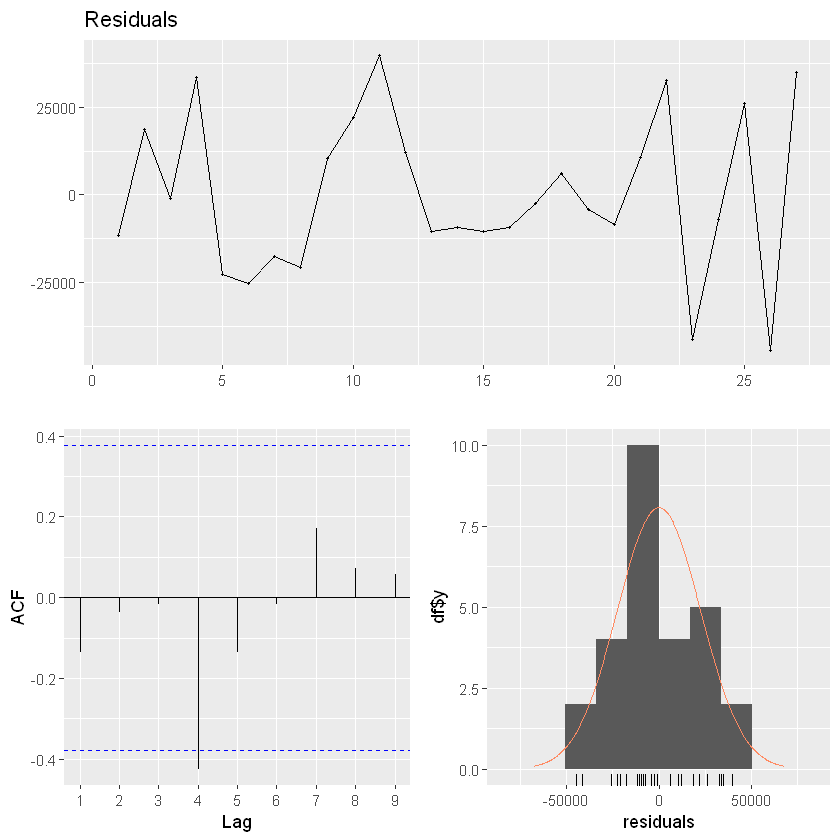

In [41]:
checkresiduals(fit_6)

* It seems that constant variance assumption of the residuals is satisfied

* Considering the autocorrelation function of residuals, although lag 4 exceeds the limit in a non-significant way, the condition that the residuals are independent in general is provided.

* Looking at the normality assumption, there is some deviation from the normal distribution. It can be said that the reason for this is due to the insufficient number of data.

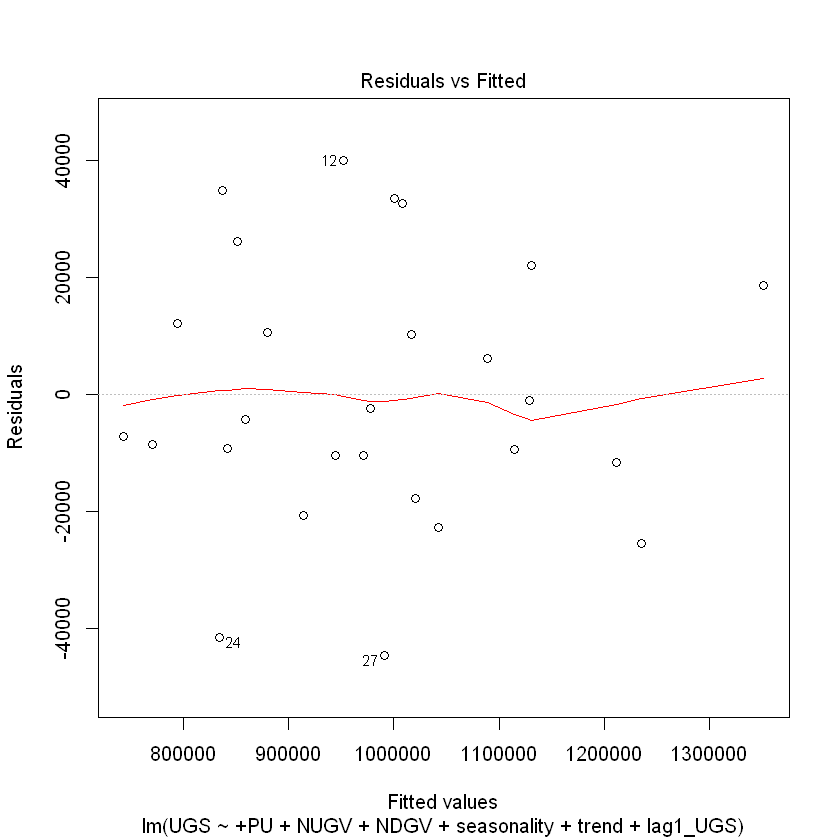

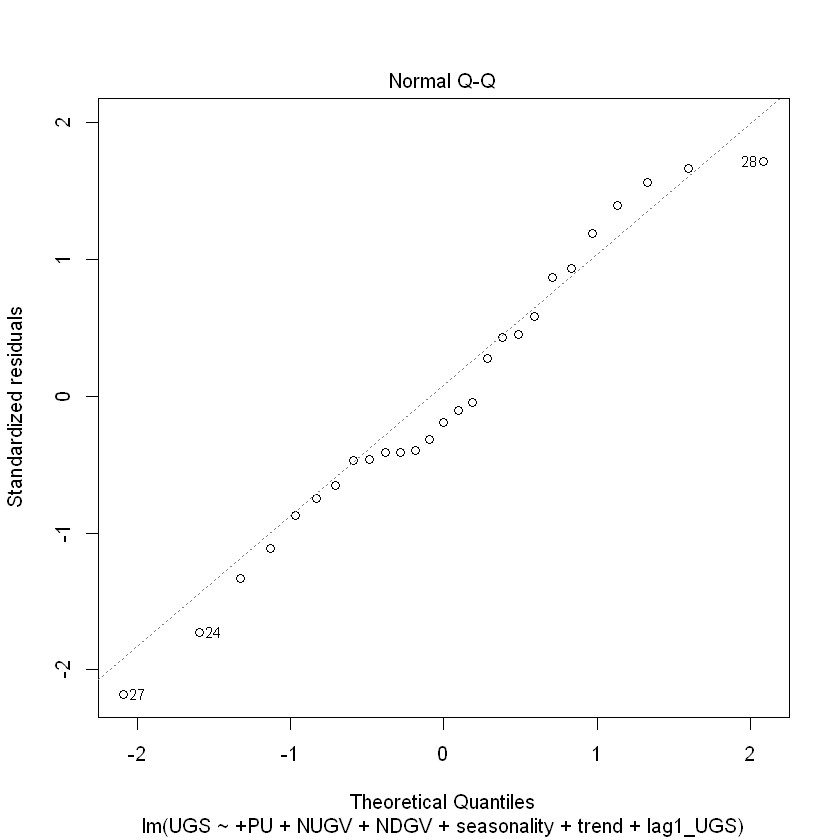

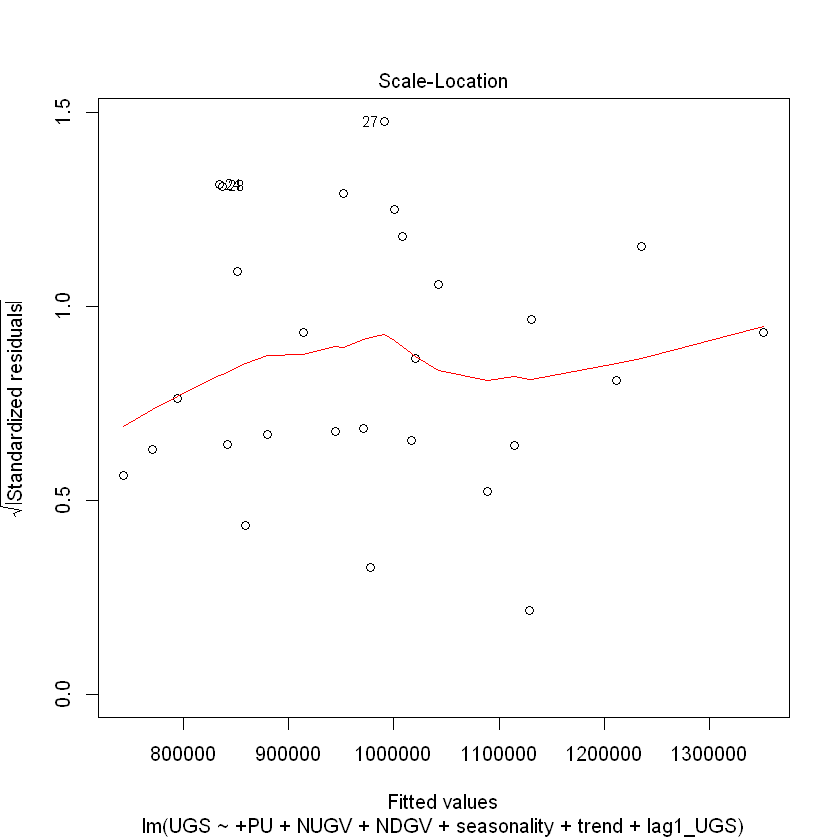

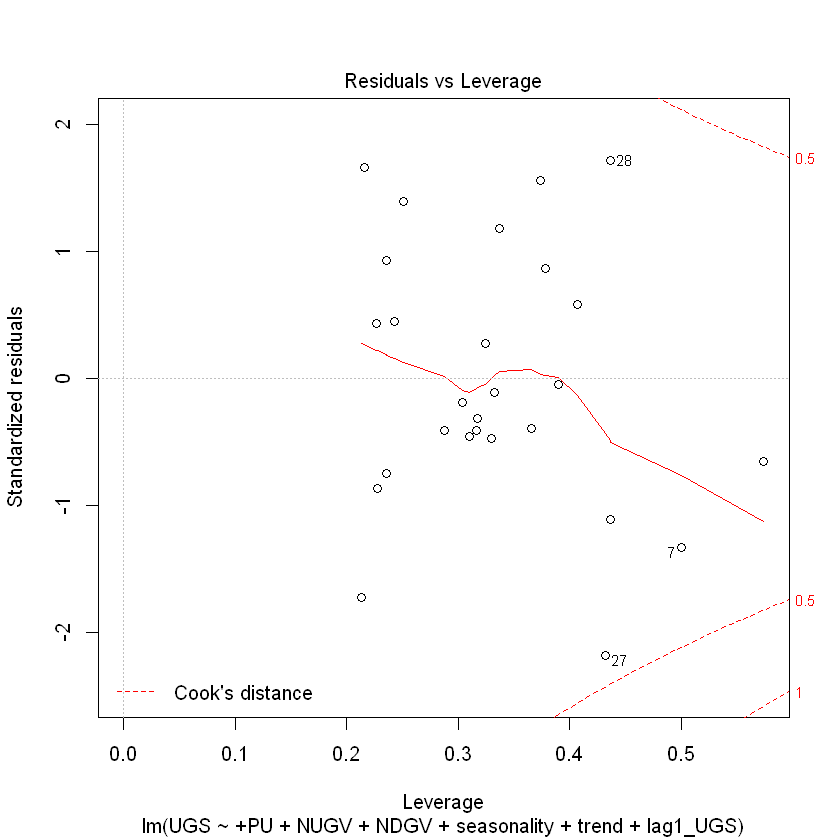

In [51]:
plot(fit_6)

* The mean value of residuals is close to zero. This supports the normal (0,sigma) distribution assumption of residuals.
* When looking Q-Q plot, again there is some distortion from theoretical y=x line. If the number of observations would be increased, the distortion from the theoritical line would be decreased.

Warning message:
"Removed 1 rows containing missing values (geom_point)."

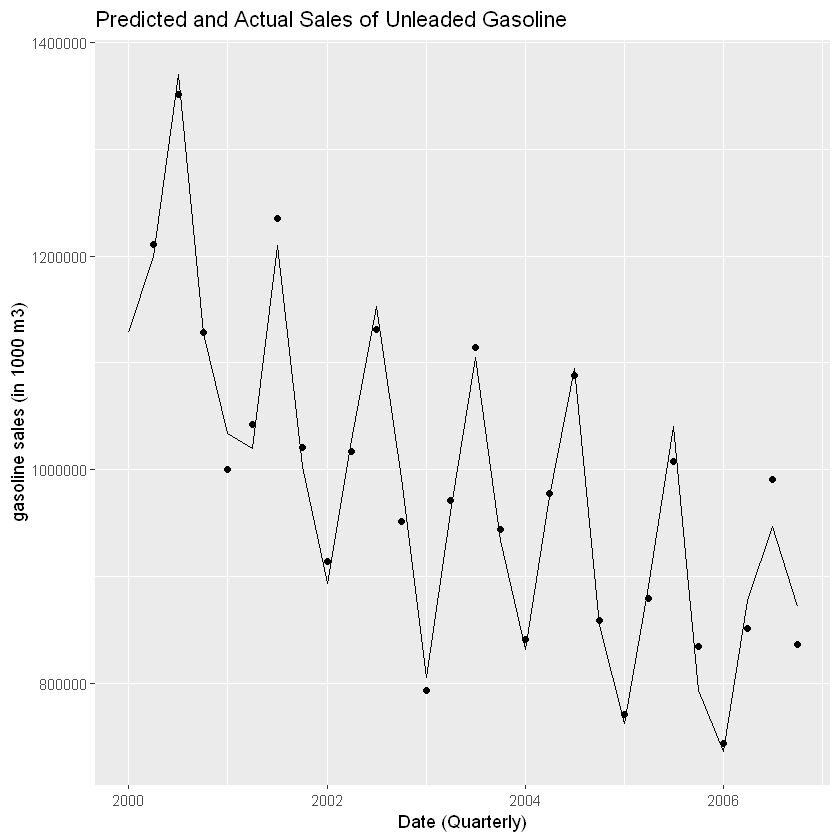

In [59]:
df_merge=d_table_tr[,c(1,2)]
df_merge[,"predicted_UGS"]=predict(fit_6,d_table_tr)
ggplot(df_merge,aes(x=index,y=UGS))+geom_line()+
    geom_point(aes(y=predicted_UGS))+ggtitle("Predicted and Actual Sales of Unleaded Gasoline")+ylab("gasoline sales (in 1000 m3)")+
    xlab("Date (Quarterly)")

## 10- Prediction

In [42]:
d_table_te[,"trend"]=c((nrow(d_table_tr)+1):(nrow(d_table_tr)+nrow(d_table_te)))
d_table_te[,"seasonality"]=as.factor(quarters(d_table_te$index))
d_table_te[1,"lag1_UGS"]=c(d_table_tr$UGS[nrow(d_table_tr)])
d_table_te[1,"predicted_UGS"]=NA

In [43]:
d_table_te

index,UGS,RNUV,NLPG,PU,PG,NUGV,NDGV,GNPA,GNPC,GNP,trend,seasonality,lag1_UGS,predicted_UGS
2007-01-01,NA,0.0074,1715000,565.19,449.19,5869018,342.1729,1132973,4857305,24413807,29,Q1,872000,NA
2007-04-01,NA,0.0106,1725300,565.19,449.19,5931348,346.9407,1570703,5852404,27597857,30,Q2,NA,NA
2007-07-01,NA,0.0101,1751050,565.19,449.19,5991280,351.4449,7140722,7480414,36741745,31,Q3,NA,NA
2007-10-01,NA,0.0124,1797400,565.19,449.19,6065597,357.2902,2418541,6397745,31361112,32,Q4,NA,NA


In [44]:
for (i in c(1:nrow(d_table_te))){
    d_table_te$predicted_UGS[i]=predict(fit_6,newdata=d_table_te[i,])
    if(i<nrow(d_table_te)){
        d_table_te$lag1_UGS[i+1]=d_table_te$predicted_UGS[i]
    }
    
}

In [46]:
d_table_te

index,UGS,RNUV,NLPG,PU,PG,NUGV,NDGV,GNPA,GNPC,GNP,trend,seasonality,lag1_UGS,predicted_UGS
2007-01-01,NA,0.0074,1715000,565.19,449.19,5869018,342.1729,1132973,4857305,24413807,29,Q1,872000.0,662492.3
2007-04-01,NA,0.0106,1725300,565.19,449.19,5931348,346.9407,1570703,5852404,27597857,30,Q2,662492.3,845565.1
2007-07-01,NA,0.0101,1751050,565.19,449.19,5991280,351.4449,7140722,7480414,36741745,31,Q3,845565.1,965974.6
2007-10-01,NA,0.0124,1797400,565.19,449.19,6065597,357.2902,2418541,6397745,31361112,32,Q4,965974.6,788131.3


## 11- Conclusion

As a result, metrics such as adjusted R squared, standard error of the residuals, RMSE and MAE were used in the selection of the model to be used while estimating the UGS. According to these measures, model 6 performs best compared to others, thus it is chosen to predict the UGS for the following 4 periods. Although the RNUV seems to be related to the UGS estimation, especially the lag 1 state, it was excluded from the model because it did not improve these metrics. In addition, GNPA, GNPC, GNP and PG, which are insignificant, were not used for UGS estimation. As a result, PU, NUGV, NDGV, trend, seasonality and lag1_UGS components were used in the model that was decided. When the residuals are controlled, it is seen that the residuals meet the conditions of zero mean, constant variance and independency, while a little deviation from the normal distribution is observed. One of the reasons for this can be said to be the very small number of data.